In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
df= pd.read_csv('ratings.csv')
df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [3]:
movies= pd.read_csv('movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
data = pd.merge(df, movies, on='movieId') 
data.head() 

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,9,16,4.0,842686699,Casino (1995),Crime|Drama
2,12,16,1.5,1144396284,Casino (1995),Crime|Drama
3,24,16,4.0,963468757,Casino (1995),Crime|Drama
4,29,16,3.0,836820223,Casino (1995),Crime|Drama


In [5]:
# Calculate mean rating of all movies 
data.groupby('title')['rating'].mean().sort_values(ascending=False).head() 

title
Being Human (1993)                   5.0
Three Ages (1923)                    5.0
The Liberator (2013)                 5.0
October Baby (2011)                  5.0
Resident Evil: Retribution (2012)    5.0
Name: rating, dtype: float64

In [6]:
# Calculate count rating of all movies 
data.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

In [7]:
# creating dataframe with mean ratings and the number of ratings 
ratings = pd.DataFrame(data.groupby('title')['rating'].mean())   
ratings['Number of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())   
ratings.head() 

,rating,Number of ratings
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


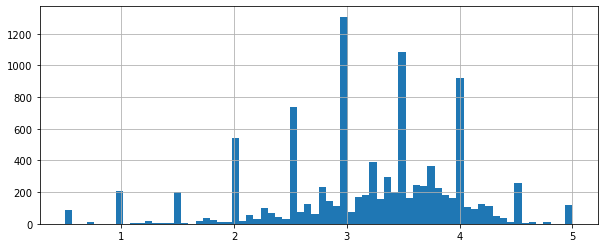

In [8]:
#Visualizing the movie ratings
plt.figure(figsize =(10, 4))   
ratings['rating'].hist(bins = 70) 
#Most ratings are between 2.5 and 4

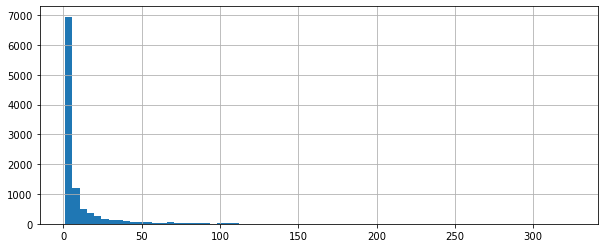

In [9]:
plt.figure(figsize =(10, 4))   
ratings['Number of ratings'].hist(bins = 70) 

In [10]:
moviemat = data.pivot_table(index ='userId',columns ='title', values ='rating')   
moviemat.head()   
ratings.sort_values('Number of ratings', ascending = False).head(10) 


,rating,Number of ratings
title,,
Pulp Fiction (1994),4.160000,325
Forrest Gump (1994),4.138264,311
"Shawshank Redemption, The (1994)",4.454545,308
Jurassic Park (1993),3.659864,294
"Silence of the Lambs, The (1991)",4.194828,290
Star Wars: Episode IV - A New Hope (1977),4.188645,273
"Matrix, The (1999)",4.264368,261
Terminator 2: Judgment Day (1991),3.960474,253
Braveheart (1995),4.108871,248


In [11]:
#persuasion_user_ratings = moviemat['Persuasion (1995)']
#using pandas corr() function to find the pairwise correlation between all the columns with respect to Persuasion.
def similarmovs(persuasion_user_ratings):
    similar_to_persuasion = moviemat.corrwith(persuasion_user_ratings)
    corr_persuasion = pd.DataFrame(similar_to_persuasion, columns =['Correlation']) 
    corr_persuasion.dropna(inplace = True) 

    corr_persuasion.sort_values('Correlation', ascending = False).head(10) 
    corr_persuasion = corr_persuasion.join(ratings['Number of ratings']) 
 
    corr_persuasion.head() 
  
    return corr_persuasion[corr_persuasion['Number of ratings']>100].sort_values('Correlation', ascending = False).head()

In [12]:
#Recommendation based on genre
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])

In [13]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [14]:
# Build a 1-dimensional array using movie titles
titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])

# Function that get movie recommendations based on the cosine similarity score of movie genres
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [15]:
genre_recommendations('Good Will Hunting (1997)').head(20)
#getting top 20 recommendations

24                            Leaving Las Vegas (1995)
27                                   Persuasion (1995)
34                                   Carrington (1995)
43                How to Make an American Quilt (1995)
46                        When Night Is Falling (1995)
68                                 Bed of Roses (1996)
76     Once Upon a Time... When We Were Colored (1995)
78                           Angels and Insects (1995)
95               Bridges of Madison County, The (1995)
114                           Frankie Starlight (1995)
119                       Up Close and Personal (1996)
154                                    Mad Love (1995)
157                     Moonlight and Valentino (1995)
165                         Scarlet Letter, The (1995)
174                               Total Eclipse (1995)
179                       Walk in the Clouds, A (1995)
187                              Before Sunrise (1995)
193                           Circle of Friends (1995)
219       

In [16]:
genre_recommendations('Toy Story (1995)').head(10)

1815                                          Antz (1998)
2496                                   Toy Story 2 (1999)
2967       Adventures of Rocky and Bullwinkle, The (2000)
3166                     Emperor's New Groove, The (2000)
3811                                Monsters, Inc. (2001)
6617    DuckTales: The Movie - Treasure of the Lost La...
6997                                     Wild, The (2006)
7382                               Shrek the Third (2007)
7987                       Tale of Despereaux, The (2008)
9215    Asterix and the Vikings (Astérix et les Viking...
Name: title, dtype: object

In [17]:
titles
op = pd.DataFrame(titles)
op

,title
0,Toy Story (1995)
1,Jumanji (1995)
2,Grumpier Old Men (1995)
3,Waiting to Exhale (1995)
4,Father of the Bride Part II (1995)
...,...
10324,Cosmic Scrat-tastrophe (2015)
10325,Le Grand Restaurant (1966)
10326,A Very Murray Christmas (2015)
10327,The Big Short (2015)


In [20]:
mov = input("enter movie")
 

enter movieSchindler's List (1993)


In [21]:
a=similarmovs(moviemat[mov])   

C:\Users\Vaishnavi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Vaishnavi\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [22]:
a

,Correlation,Number of ratings
title,,
Schindler's List (1993),1.000000,248
"Bug's Life, A (1998)",0.539726,102
Jaws (1975),0.493631,109
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964),0.479229,125
Dances with Wolves (1990),0.472443,201


In [23]:
genre_recommendations(mov)

67                           Misérables, Les (1995)
186           Before the Rain (Pred dozhdot) (1994)
296                        Walking Dead, The (1995)
471                         Schindler's List (1993)
555     Land and Freedom (Tierra y libertad) (1995)
636                               Stalingrad (1993)
795                         Nothing Personal (1995)
887                                  Platoon (1986)
931        Tin Drum, The (Blechtrommel, Die) (1979)
943                           Paths of Glory (1957)
978                                      Ran (1985)
983                        Full Metal Jacket (1987)
1001                                   Glory (1989)
1022                        Deer Hunter, The (1978)
1031                                  Patton (1970)
1057                     Killing Fields, The (1984)
1333                     Welcome to Sarajevo (1997)
1355                                    Bent (1997)
1502                            Mrs. Miniver (1942)
1505        